In this checkpoint, we'll explore matplotlib — the standard plotting library for python and another part of the Scientific Python Toolkit — to create basic plots like line plots, scatter plots, histograms, and boxplots. These kinds of visualizations can be particularly useful when you're initially exploring data, and you'll use them all the time.

This checkpoint ends with an assignment where you'll be asked to generate line plots, scatter plots, histograms and boxplots for a dataset of your choosing.


## Loading pyplot (as plt)

*Matplotlib* is the fundamental plotting and visualization library for Python. It can create a myriad of plots (a *plot* is a way of visually representing data), and it is actually the foundation for many of the other plotting packages in Python. For this section, we're going to primarily focus on the **pyplot** portion of the library. The convention to load pyplot is:

`import matplotlib.pyplot as plt`

## Line Plots

Let's start by just putting a list of values into the plot function and see what it does.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  

In [2]:
plt.plot([0, 1, 2, 3])

And... nothing happened (for some versions of Jupyter notebook). Just a weird description of our plot object that doesn't make much sense. That's because we have to explicitly _show_ the plot. You can do that by calling `plt.show()`.

If you're using Jupyter notebooks you'll want to use the magic `%matplotlib inline` to get your plots rendering well. It's good practice to always include that line in your first cell when working with Jupyter notebooks, along with loading your packages. This statement makes sure your images will always generate in the notebook instead of possibly as popups and prevents a slow matplotlib compilation from giving you rendering errors.

Also, you won't always need `plt.show()` at the end of a cell in a notebook, but it's good practice to keep it there. It will be useful to ensure that all the options and specifications you add to your plot are properly rendered. We'll explain more later.

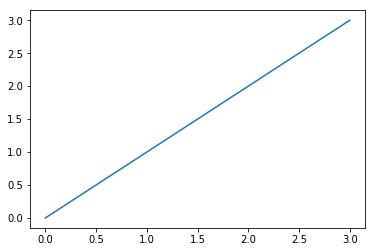

In [3]:
%matplotlib inline
plt.plot([0, 1, 2, 3])
plt.show()

There we go. Now we should also set up a data set. For this assignment we'll build a dataset so that we can see some nice trends. Follow along with the code below.

In [4]:
# Make the random function consistent and replicable.
np.random.seed(1221)

# Make a blank data frame.
df = pd.DataFrame()

# Add a column of random numbers between 0 and 1.
df['rand'] = np.random.rand(100)
df['rand_sq'] = df['rand'] ** 2
df['rand_shift'] = df['rand'] + 2

# When creating a data frame an index column of counts is created, counting from 0.
# Here we do a few transforms on that index to create some extra columns.
df['counts_sq'] = df.index ** 2 
df['counts_sqrt'] = np.sqrt(df.index)

OK. Now we have our data frame, simply called `df` with some descriptively named columns and default row indexes. First, let's look at that random column.

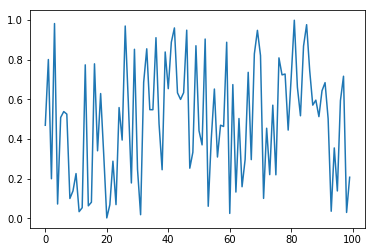

In [5]:
plt.plot(df['rand'])
plt.show()

That's not bad. By default, plot creates a line graph with the index as the x-axis. Recall that by default the index is a count starting from 0. 

## Basic Options

The plot generated above is as simple as it gets in matplotlib, but there are many things you can do to make your plots more distinctive and informative. Let's say I want to change the color to purple, expand the y-axis, label the y-axis, and give the whole thing a title.

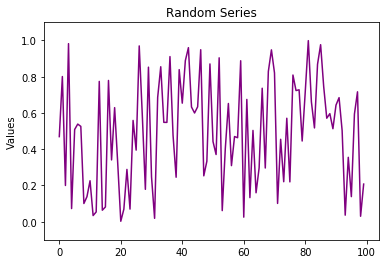

In [6]:
plt.plot(df['rand'], color='purple')
plt.ylim([-0.1, 1.1])
plt.ylabel('Values')
plt.title('Random Series')
plt.show()

Now that's much better. The logic for adjusting the x-axis is exactly the same as the y, and there are countless other features you can add to your charts. One last thing for this chart: let's add a second series. To do this call `.plot()` a second time for the second series. We'll also want to adjust the y-axis.

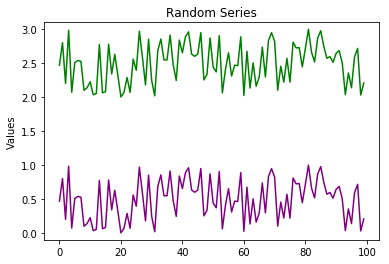

In [7]:
plt.plot(df['rand'], color='purple')
plt.plot(df['rand_shift'], color='green')
plt.ylim([-0.1, 3.1])
plt.ylabel('Values')
plt.title('Random Series')
plt.show()

We'll show off more throughout the course, but that's a good intro to line charts in matplotlib. 

## Scatter

Let's look at one other common kind of plot first, the scatter. This works much the same as `.plot()` and is called with `.scatter()` instead.

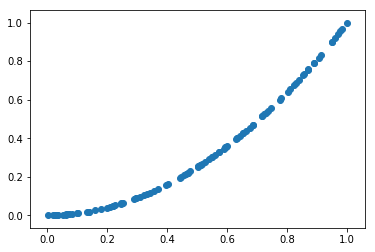

In [8]:
plt.scatter(x=df['rand'], y=df['rand_sq'])
plt.show()

This generates the most simple of scatter plots in matplotlib. Much like the line plots above, we can also use options to make the visualization more attractive. Let's try a few here.

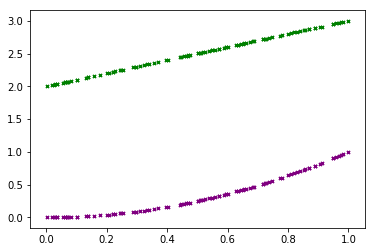

In [9]:
plt.scatter(
    x=df['rand'],
    y=df['rand_sq'],
    color='purple',
    marker='x', s=10
)
plt.scatter(
    x=df['rand'],
    y=df['rand_shift'],
    color='green',
    marker='x', s=10
)
plt.show()

There is much more we can do with options in matplotlib, but these are a few things to help you get off the ground. Always feel free to look at the documentation, particularly the `matplotlib.pyplot.plot()` [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) (see the section on keyword arguments) and other methods like [`.ylim()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.ylim), [`.ylabel()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.ylabel), and [`title()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.title) for more ideas. When in doubt, there's probably a way to do it.


## Pandas Plot

It's also worth noting here that for simple plots we can take a shortcut using some of the matplotlib functionality that was baked into pandas. It's easy to use but not as powerful, so it won't be sufficient for every case.

Pandas gives us the `.plot()` data frame method, so you can create a plot directly with pandas like this:

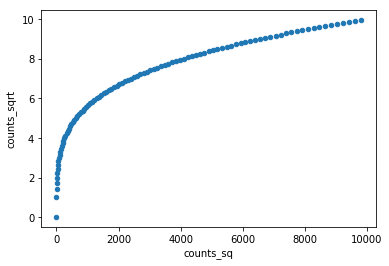

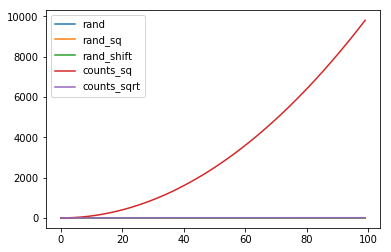

In [10]:
df.plot(kind='scatter', x='counts_sq',y= 'counts_sqrt')
df.plot(kind='line')
plt.show()

It's much simpler to use, but these plots are kind of ugly. Though there is more formatting you *could* do, you'll have more control if you use something like the pyplot functionality in matplotlib we showed above. But if you just want to get a quick look at your data this can be a valuable tool.

In [11]:
## Subplots

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Make the random function consistent and replicable.
np.random.seed(1221)

# Make a blank data frame.
df = pd.DataFrame()
df['rand'] = np.random.rand(100)  # Add a column of random numbers between 0 and 1.
df['rand_sq'] = df['rand'] ** 2
df['rand_shift'] = df['rand'] + 2

# When creating a data frame an index column of counts is created, counting from 0.
# Here we do a few transforms on that index to create some extra columns.
df['counts_sq'] = df.index ** 2 
df['counts_sqrt'] = np.sqrt(df.index)


Now, there is one more functionality of matplotlib we want to introduce in this module: the subplot.

Subplots are matplotlib's way of generating multiple plots in a single figure. You break up your figure into multiple distinct areas and generate different plots in each area. This can be extremely useful for generating a series of plots and presenting them in a clearly associated way. It also can make it easy to transfer multiple visuals as a single unit. Note that the visuals below are a single image.

Now let's put these two plots together in one object as two sub plots. For that we'll use the subplot functionality of matplotlib. To do that, we need to define the subplot before generating each plot. That can be done using `plt.subplot()`, which takes three arguments. The first two parameters define the dimensions of the plot, while the third identifies the subplot you're creating. Like so:

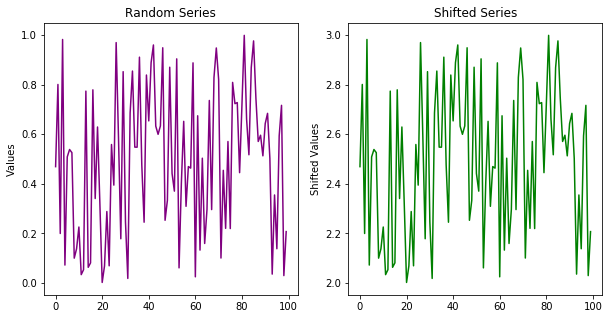

In [12]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(df['rand'], color='purple')
plt.ylabel('Values')
plt.title('Random Series')

plt.subplot(1, 2, 2)
plt.plot(df['rand_shift'], color='green')
plt.ylabel('Shifted Values')
plt.title('Shifted Series')
plt.show()

So we created a 1 high, 2 wide subplot with the random series on top and the shifted series below. Great! But how did it really work?

Well, the `plt.figure()` function sets the size of the figure we're about to create, taking a tuple with the  x and y dimensions we want. Then each plot gets created using the `plt.subplot()` function. This specifies which plot we're going to work on. You generate a grid with the first two parameters, with rows followed by columns like the pandas selecting logic, then pick which subplot within the grid to make via the third parameter. That parameter increases numerically throughout the grid, so this only works for subplots with less than 10 figures (though there are other ways to handle such cases).

You could also add different types of plots as subplots, so we could have one plot in this figure be a scatter while the other is a line plot. Let's also add one other feature, `tight_layout`. This creates additional spacing around the subplots. It can be extremely helpful when dealing with many subplots or when the figure starts to look a little claustrophobic.

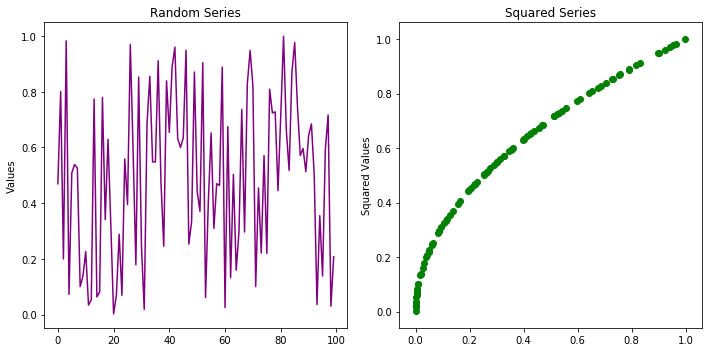

In [13]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(df['rand'], color='purple')
plt.ylabel('Values')
plt.title('Random Series')

plt.subplot(1, 2, 2)
plt.scatter(x = df['rand_sq'], y = df['rand'], color='green')
plt.ylabel('Squared Values')
plt.title('Squared Series')

plt.tight_layout()
plt.show()

These are the basics of plotting with matplotlib. There will be many more things we'll accomplish with this package, and we'll continue to introduce more topics as we move through the course. As you go along, it may be helpful to refer to the full [documentation](http://matplotlib.org/users/index.html) to see what matplotlib is truly capable of.

## Statistical plots

We've covered some of the basics of plotting and visualization with matplotlib, and while things like line and scatter plots are fantastic tools for describing data, it is worth covering some of the specifically statistical forms of visualization that are easily available within matplotlib.

### Histogram

The **histogram** is a great tool for showing the possible values of a variable, as well as how common those values are.

Let's make one now. First we'll generate some random variables from a normal distribution (don't worry if you aren't familiar with this, we'll talk about more in the next unit), and then generate the plot.

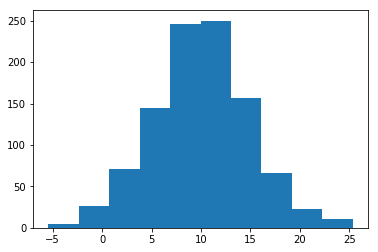

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generate 1000 random values.
x = np.random.normal(10, 5, 1000)

# Plot them as a histogram.
plt.hist(x) 
plt.show()

The `10` and `5` we're passing into `random.normal()` are the "center" and the "standard deviation" of the normal curve we're using. Don't worry if you aren't familiar with those yet; we'll cover them in the next unit as well.

Now that we have a histogram let's go into a little more detail about how it works. It starts by dividing the values in the input into bins. These bins are evenly sized ranges that have an upper and lower bound. The histogram then counts how many values are in each bin and plots a bar for that count for each bin. That gives you a sense of the density of the variable across its range. Histograms are fantastic for visualizing the distribution of a variable.

#### Bin count and placement

By default, matplotlib distributes all values into ten bins and chooses the best placement for those bins. That might not be the number you want and is totally adjustable with the `bins` keyword argument. 

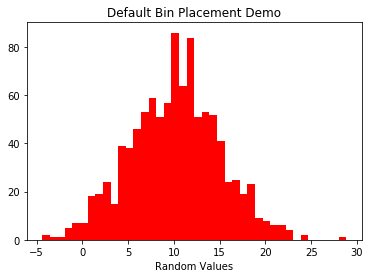

In [15]:
# Random data.
x = np.random.normal(10, 5, 1000)

# Build our histogram. Let's go ahead and set the color too.
plt.hist(x, bins=40, color='red')
plt.title('Default Bin Placement Demo')
plt.xlabel('Random Values')
plt.show()

If you re-run that cell above you'll notice that the x-axis and bin location will change slightly each time depending on the values of the underlying data. The edges of the bins probably don't line up exactly with the integer marks on the horizontal axis. That's because we're telling matplotlib _how many_ bins we want instead of _where_ we want each bin to be.

We can specify bin placement by passing in an array of _specific bounds_ for your bins rather than just the total _number_ you want. Let's do that and create a histogram with bins at exactly the integer marks from -10 to 40. While we're at it we'll add a second histogram to our figure.

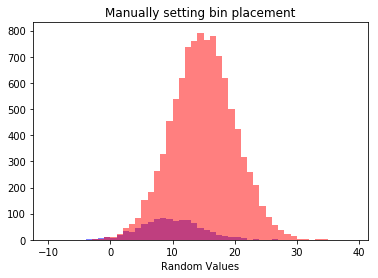

In [16]:
# Data to play with. Twice the histograms, twice the fun.
x = np.random.normal(10, 5, 1000)
y = np.random.normal(15, 5, 10000)

# Override bin defaults with specific bin bounds.
# FYI `alpha` controls the opacity.
plt.hist(x, color='blue', bins=np.arange(-10, 40), alpha=.5) 
plt.hist(y, color='red', bins=np.arange(-10, 40), alpha=.5)
plt.title('Manually setting bin placement')
plt.xlabel('Random Values')

plt.show()

#### Normalizing histograms

Did you notice it's difficult to compare the distributions of the two variables with these two histograms? The scales of each variable are incompatible, so their heights are also incompatible, with the red histogram dominating the visualization. _Normalization_ allows you to solve this problem by rescaling the height of the bins so that the total area under each curve sums to 1.

This is useful when you have variables of different sizes (one with tens of thousands of observations, one with hundreds, for example) and you wish to compare their histograms.

Here is a plot with the same histograms, but this time they're normed.

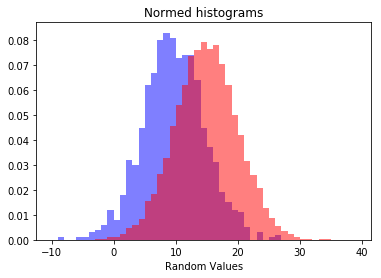

In [17]:
# Same data, this time normed, using density.
plt.hist(x, density=True, color='blue', bins=np.arange(-10, 40), alpha=.5) 
plt.hist(y, density=True, color='red', bins=np.arange(-10, 40), alpha=.5)
plt.title('Normed histograms')
plt.xlabel('Random Values')

plt.show()

That's much easier to compare. Normalizing makes it easier to see the differences in the distributions between these two variables.

Those are the basics of histograms in Python. There is plenty more you can do with them. You're welcome to explore the `.hist()`[documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist), or simply follow along as we explore more later through the course.


### Boxplot

Another useful visualization is the _boxplot_. You can create one with the `plt.boxplot()` method, which takes an array and a series of other options as parameters, as well as the standard pyplot options for things like color.

A boxplot is a relatively simple visualization. Let's generate one and then go through its features. All we need is an array or variables. We'll use the same distribution as before. 

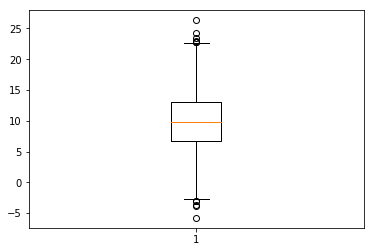

In [18]:
# Set the random seed to keep the example consistent.
np.random.seed(111)

# Sample data.
x = np.random.normal(10, 5, 1000)

# Generate and display the box plot.
plt.boxplot(x)
plt.show()

This plot consists of a box, which covers what is called the interquartile range. Let's talk about quartiles for a moment. You can divide data into quarters like this:
 
 * the lowest value to the 25th percentile,
 * the 25th percentile to the median,
 * the median to the 75th percentile, and
 * the 75th percentile to the maximum value.

These groups are called _quartiles_, and the middle two together are called the _interquartile range_, or "_IQR_". So the box in our visualization includes all the data from the 25th percentile to the 75th percentile, with a red line indicating the median.

Then there are the whiskers above and below the box (these plots are sometimes called "box and whisker plots"). The whiskers will extend up and down up to a distance of 1.5x the IQR away from the top and bottom of the box. If all values are within that range, the whiskers will go to the max and min of the variable. Anything beyond 1.5x the IQR will be represented as a _flier_, or a small tick beyond the end of the whiskers. Our plot above has several fliers above and below the whiskers. Here is one with fliers on the top only.

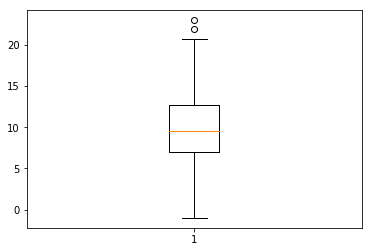

In [19]:
# Set the random seed to keep the example consistent.
np.random.seed(111)

# Sample data.
x = np.random.normal(10, 5, 100)

# Generate and display the box plot.
plt.boxplot(x)
plt.show()

Boxplots *aren't* useful for learning about the density or distribution of a variable. However, they are *very* useful for investigating the range of values and identifying possible _outliers_, or extreme values that warrant investigation and that may require special treatment. 

Data points marked with a flier on a box plot are often outliers. For this reason box plots are commonly used when initially exploring new data. You can read more about boxplots in the `.boxplot()` [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot) if you like.


## Assignment


Let's go out into the world and generate some beautiful visuals. Pick a data source from [this aggregation](https://github.com/awesomedata/awesome-public-datasets), load the data into a pandas data frame, and generate a series of visuals around that data using pyplot.

Each visualization should be accompanied by 2-3 sentences describing what you think is revealed by this representation. Generate at least four different visuals, and be sure to use different types as well as the subplot functionality discussed above. And remember: clean and elegant visuals are key to telling a coherent story.

Collect your images and descriptions into a shareable format. A Jupyter notebook is best, but anything you can link to is fine, including Google docs or markdown files on GitHub or gists, and share the link below.